<div style="
    background: linear-gradient(135deg, #0d0d0d, #1f1f1f, #2e2e2e);
    border: 2px solid #00D4FF;
    border-radius: 16px;
    padding: 25px;
    box-shadow: 0 0 25px rgba(0, 212, 255, 0.4);
    font-family: 'Segoe UI', sans-serif;
    color: #f2f2f2;
    line-height: 1.7;
">

<h1 style="
    text-align: center;
    color: #00D4FF;
    font-size: 32px;
    text-shadow: 0 0 10px #0099CC;
">🌍 Global Capitals Weather Analysis — Comprehensive Data Insights</h1>

<p style="text-align:center; font-size:14px; color:#00D4FF; margin-top:-5px;">
Created by <b>Shreyash Patil</b> | Climate & Data Science Project 2025
</p>

<p style="font-size:17px; text-align:justify; color:#e6e6e6;">
This project presents a <b style="color:#00D4FF;">comprehensive analysis of weather patterns</b> across <b style="color:#00FFFF;">global capital cities</b> 
using advanced data science techniques. By analyzing <b style="color:#4DD0E1;">temperature, precipitation, wind, and solar radiation data</b> 
from diverse geographic locations, the project uncovers fascinating climate trends, extreme weather events, and hemispheric differences 
that shape our planet's weather systems.
</p>

<p style="font-size:16px; text-align:justify; color:#80DEEA;">
<b>Reasons & Motivation:</b> Understanding global weather patterns is crucial for climate research, travel planning, agricultural forecasting, 
and urban development. This analysis provides data-driven insights that help stakeholders make informed decisions about energy, tourism, 
and environmental planning across world capitals.
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

In [3]:
df = pd.read_csv('/kaggle/input/daily-global-capitals-weather-data/history_latest.csv')
df.shape

(203, 20)

In [4]:
df.head(5)

,date,country,country_alpha2,capital,lat,lon,temp_min_c,temp_max_c,temp_mean_c_approx,app_temp_min_c,app_temp_max_c,precip_mm,rain_mm,snow_mm,windspeed_10m_max_kmh,windgusts_10m_max_kmh,wind_dir_dom_deg,sunshine_duration_s,daylight_duration_s,shortwave_radiation_MJ_m2
0,2025-11-04,Afghanistan,AF,Kabul,34.532778,69.165833,-0.2,8.0,3.90,-4.6,4.1,0.0,0.0,0.0,11.3,48.6,319.0,35244.84,38404.50,16.42
1,2025-11-04,Albania,AL,Tirana,41.328889,19.817778,10.0,18.2,14.10,8.6,18.1,6.3,4.9,0.0,7.2,14.4,314.0,22460.68,36984.65,7.32
2,2025-11-04,Algeria,DZ,Algiers,36.776389,3.058611,12.9,24.1,18.50,13.6,24.5,0.0,0.0,0.0,9.5,28.4,358.0,33211.18,37994.22,13.92
3,2025-11-04,Andorra,AD,Andorra la Vella,42.507222,1.522222,6.9,15.6,11.25,4.3,12.6,0.0,0.0,0.0,9.8,27.0,200.0,32344.27,36701.57,12.21
4,2025-11-04,Angola,AO,Luanda,-8.838333,13.234444,24.3,26.7,25.50,27.8,30.5,0.3,0.0,0.0,19.6,27.4,204.0,35946.47,44814.14,17.13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       203 non-null    object 
 1   country                    203 non-null    object 
 2   country_alpha2             202 non-null    object 
 3   capital                    203 non-null    object 
 4   lat                        203 non-null    float64
 5   lon                        203 non-null    float64
 6   temp_min_c                 203 non-null    float64
 7   temp_max_c                 203 non-null    float64
 8   temp_mean_c_approx         203 non-null    float64
 9   app_temp_min_c             203 non-null    float64
 10  app_temp_max_c             203 non-null    float64
 11  precip_mm                  203 non-null    float64
 12  rain_mm                    203 non-null    float64
 13  snow_mm                    203 non-null    float64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,203.0,18.961167,24.517921,-41.288889,4.016389,17.250000,40.058574,64.175000
lon,203.0,18.956759,68.344024,-175.201808,-9.971869,19.040833,47.752500,179.117361
temp_min_c,203.0,16.723153,8.868757,-13.800000,8.500000,18.200000,24.350000,28.900000
temp_max_c,203.0,23.233005,8.415300,-8.800000,15.850000,26.700000,29.500000,38.300000
temp_mean_c_approx,203.0,19.978079,8.386982,-10.100000,12.125000,22.600000,27.275000,32.550000
app_temp_min_c,203.0,17.272414,11.618866,-18.200000,6.600000,18.400000,28.350000,34.000000
app_temp_max_c,203.0,24.287685,11.126322,-15.000000,13.100000,27.800000,33.800000,39.200000
precip_mm,203.0,2.815764,5.134907,0.000000,0.000000,0.200000,3.050000,25.900000
rain_mm,203.0,0.715764,2.573234,0.000000,0.000000,0.000000,0.000000,24.100000
snow_mm,203.0,0.012759,0.130518,0.000000,0.000000,0.000000,0.000000,1.540000


# 🧹 DATA CLEANING & PREPROCESSING

In [7]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Check missing values
missing_values = df.isnull().sum()
print(f"\n🔍 Missing Values:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "✅ No missing values!")

# Fill missing country_alpha2 if any
if df['country_alpha2'].isnull().sum() > 0:
    df['country_alpha2'].fillna('Unknown', inplace=True)

# Create additional features
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day_of_week'] = df['date'].dt.day_name()
df['season'] = df['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Temperature range
df['temp_range_c'] = df['temp_max_c'] - df['temp_min_c']

# Hemisphere classification
df['hemisphere'] = df['lat'].apply(lambda x: 'Northern' if x > 0 else 'Southern')

# Classify climate zones based on mean temperature
def classify_climate(temp):
    if temp < 0:
        return 'Polar'
    elif temp < 10:
        return 'Cold'
    elif temp < 20:
        return 'Temperate'
    elif temp < 25:
        return 'Warm'
    else:
        return 'Hot'

df['climate_zone'] = df['temp_mean_c_approx'].apply(classify_climate)

print("✅ Data cleaning completed!")
print(f"📅 Date range: {df['date'].min()} to {df['date'].max()}")
print(f"🌍 Number of countries: {df['country'].nunique()}")
print(f"🏙️ Number of capitals: {df['capital'].nunique()}")
print("\n")


🔍 Missing Values:
country_alpha2    1
dtype: int64
✅ Data cleaning completed!
📅 Date range: 2025-11-04 00:00:00 to 2025-11-04 00:00:00
🌍 Number of countries: 203
🏙️ Number of capitals: 203




/tmp/ipykernel_13/4126843141.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country_alpha2'].fillna('Unknown', inplace=True)


## EXPLORATORY DATA ANALYSIS (EDA)

In [8]:
import os
os.makedirs('/kaggle/working/charts', exist_ok=True)

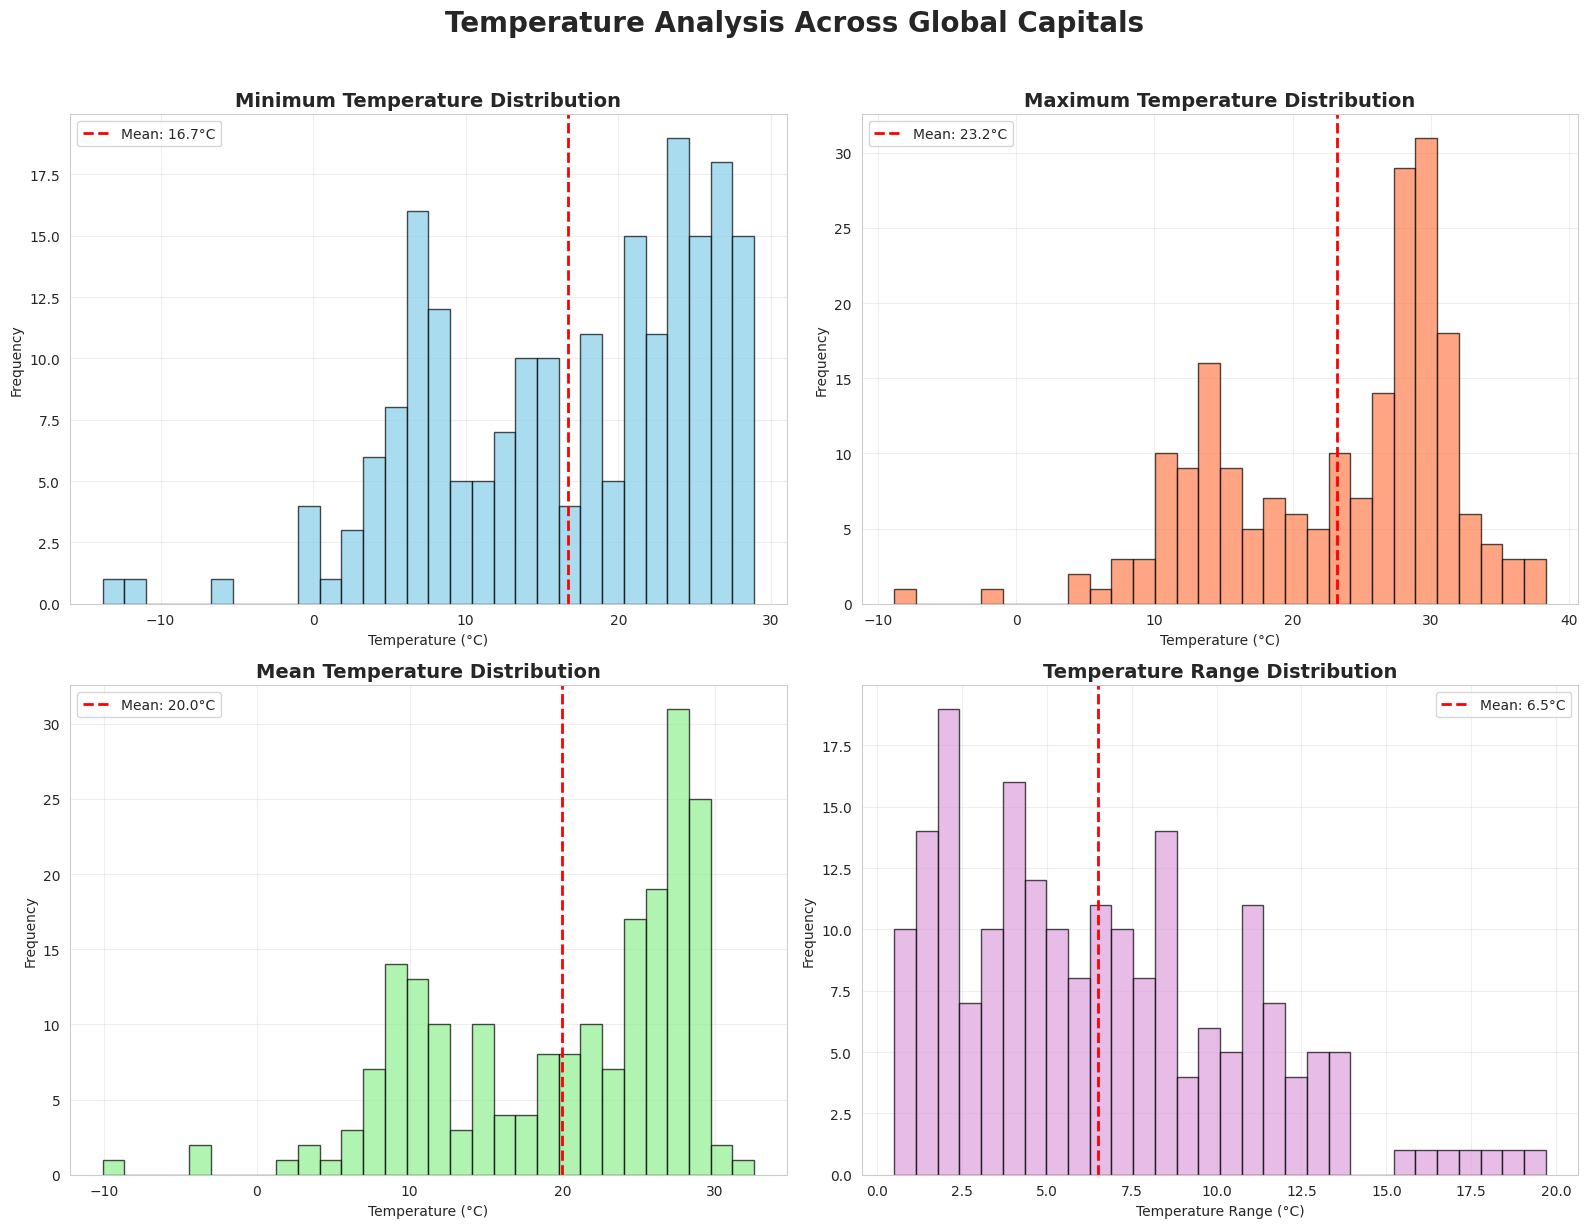

Chart 1: Temperature Distribution - Saved!


In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Temperature Analysis Across Global Capitals', fontsize=20, fontweight='bold', y=1.02)

# Min Temperature Distribution
axes[0, 0].hist(df['temp_min_c'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Minimum Temperature Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['temp_min_c'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['temp_min_c'].mean():.1f}°C")
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Max Temperature Distribution
axes[0, 1].hist(df['temp_max_c'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Maximum Temperature Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Temperature (°C)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['temp_max_c'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['temp_max_c'].mean():.1f}°C")
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Mean Temperature Distribution
axes[1, 0].hist(df['temp_mean_c_approx'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Mean Temperature Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Temperature (°C)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df['temp_mean_c_approx'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['temp_mean_c_approx'].mean():.1f}°C")
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Temperature Range Distribution
axes[1, 1].hist(df['temp_range_c'], bins=30, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Temperature Range Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Temperature Range (°C)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(df['temp_range_c'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['temp_range_c'].mean():.1f}°C")
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/charts/01_temperature_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 1: Temperature Distribution - Saved!")

# VISUALIZATION 2: Top 20 Hottest and Coldest Cities


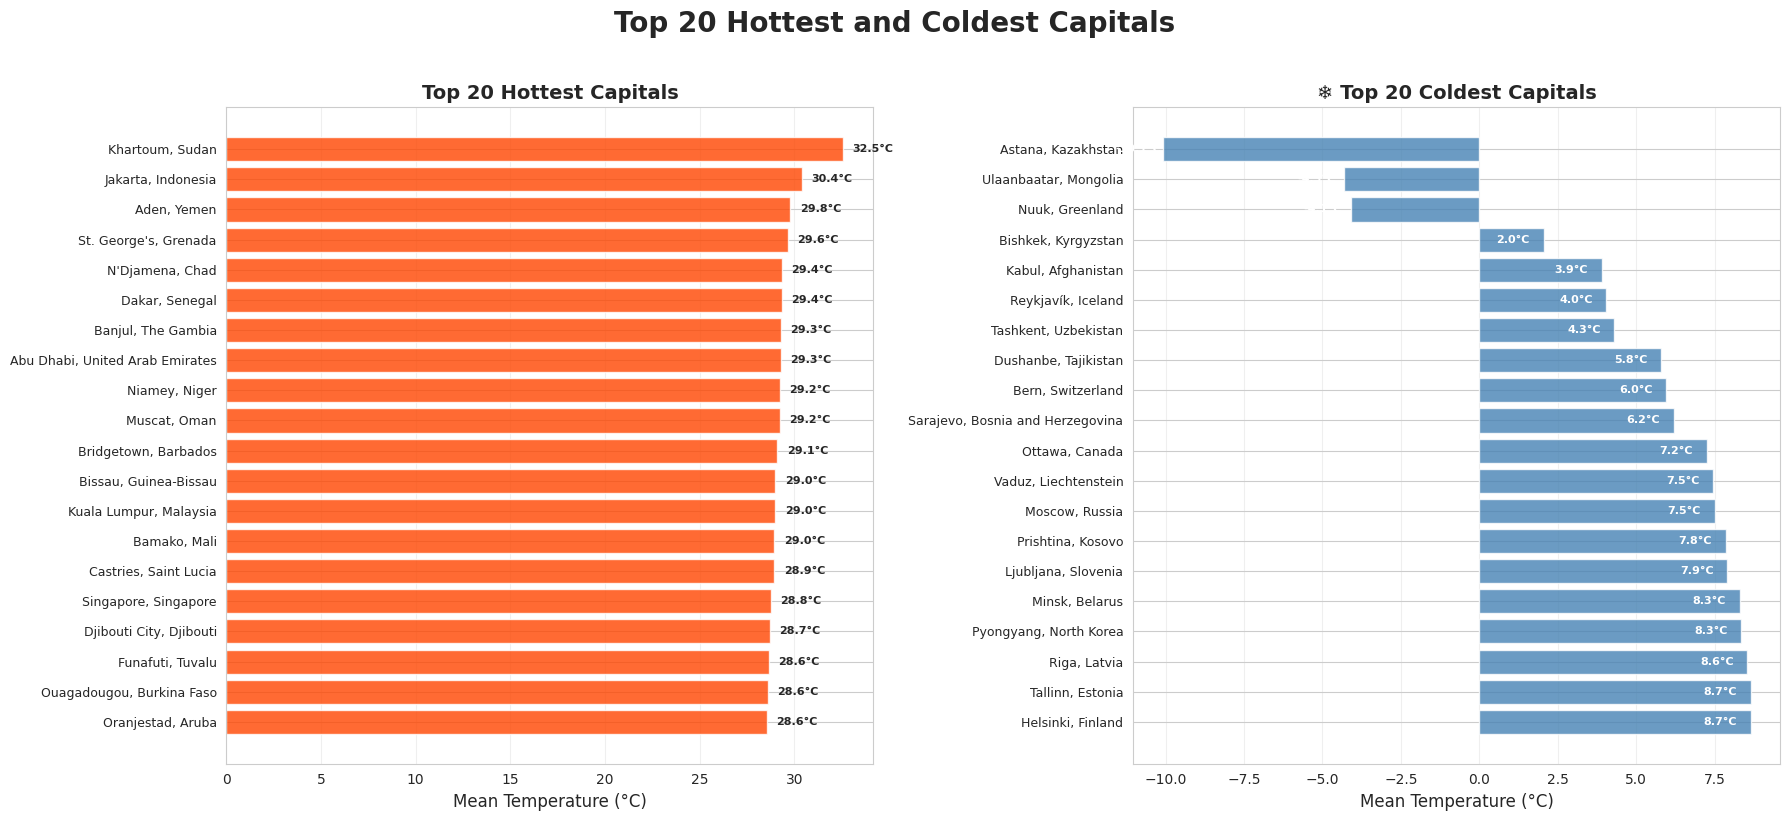

Chart 2: Hottest and Coldest Cities - Saved!


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Top 20 Hottest and Coldest Capitals', fontsize=20, fontweight='bold', y=1.02)

# Hottest cities
hottest = df.nlargest(20, 'temp_mean_c_approx')[['capital', 'country', 'temp_mean_c_approx']].sort_values('temp_mean_c_approx')
axes[0].barh(range(len(hottest)), hottest['temp_mean_c_approx'], color='orangered', alpha=0.8)
axes[0].set_yticks(range(len(hottest)))
axes[0].set_yticklabels([f"{cap}, {cou}" for cap, cou in zip(hottest['capital'], hottest['country'])], fontsize=9)
axes[0].set_xlabel('Mean Temperature (°C)', fontsize=12)
axes[0].set_title('Top 20 Hottest Capitals', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Add temperature values on bars
for i, v in enumerate(hottest['temp_mean_c_approx']):
    axes[0].text(v + 0.5, i, f'{v:.1f}°C', va='center', fontsize=8, fontweight='bold')

# Coldest cities
coldest = df.nsmallest(20, 'temp_mean_c_approx')[['capital', 'country', 'temp_mean_c_approx']].sort_values('temp_mean_c_approx', ascending=False)
axes[1].barh(range(len(coldest)), coldest['temp_mean_c_approx'], color='steelblue', alpha=0.8)
axes[1].set_yticks(range(len(coldest)))
axes[1].set_yticklabels([f"{cap}, {cou}" for cap, cou in zip(coldest['capital'], coldest['country'])], fontsize=9)
axes[1].set_xlabel('Mean Temperature (°C)', fontsize=12)
axes[1].set_title('❄️ Top 20 Coldest Capitals', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Add temperature values on bars
for i, v in enumerate(coldest['temp_mean_c_approx']):
    axes[1].text(v - 1.5, i, f'{v:.1f}°C', va='center', fontsize=8, fontweight='bold', color='white')

plt.tight_layout()
plt.savefig('/kaggle/working/charts/02_hottest_coldest_cities.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 2: Hottest and Coldest Cities - Saved!")

# VISUALIZATION 3: Climate Zones Distribution

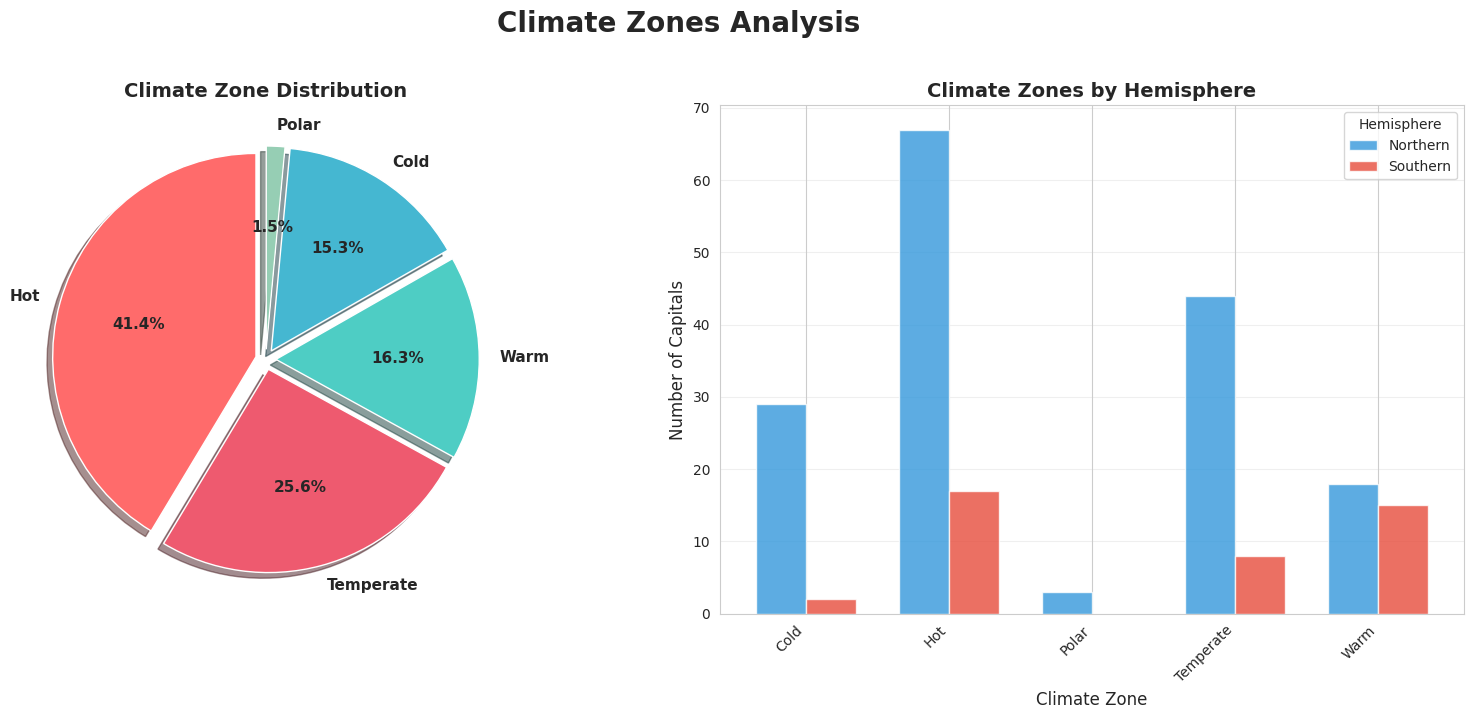

Chart 3: Climate Zones - Saved!


In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Climate Zones Analysis', fontsize=20, fontweight='bold', y=1.02)

# Climate zones pie chart
climate_counts = df['climate_zone'].value_counts()
colors = ['#ff6b6b', '#ee5a6f', '#4ecdc4', '#45b7d1', '#96ceb4']
explode = [0.05] * len(climate_counts)

axes[0].pie(climate_counts, labels=climate_counts.index, autopct='%1.1f%%', 
            colors=colors, explode=explode, shadow=True, startangle=90,
            textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[0].set_title('Climate Zone Distribution', fontsize=14, fontweight='bold')

# Climate zones by hemisphere
climate_hemisphere = pd.crosstab(df['climate_zone'], df['hemisphere'])
climate_hemisphere.plot(kind='bar', ax=axes[1], color=['#3498db', '#e74c3c'], alpha=0.8, width=0.7)
axes[1].set_title('Climate Zones by Hemisphere', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Climate Zone', fontsize=12)
axes[1].set_ylabel('Number of Capitals', fontsize=12)
axes[1].legend(title='Hemisphere', fontsize=10)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('/kaggle/working/charts/03_climate_zones.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 3: Climate Zones - Saved!")

# VISUALIZATION 4: Precipitation Analysis

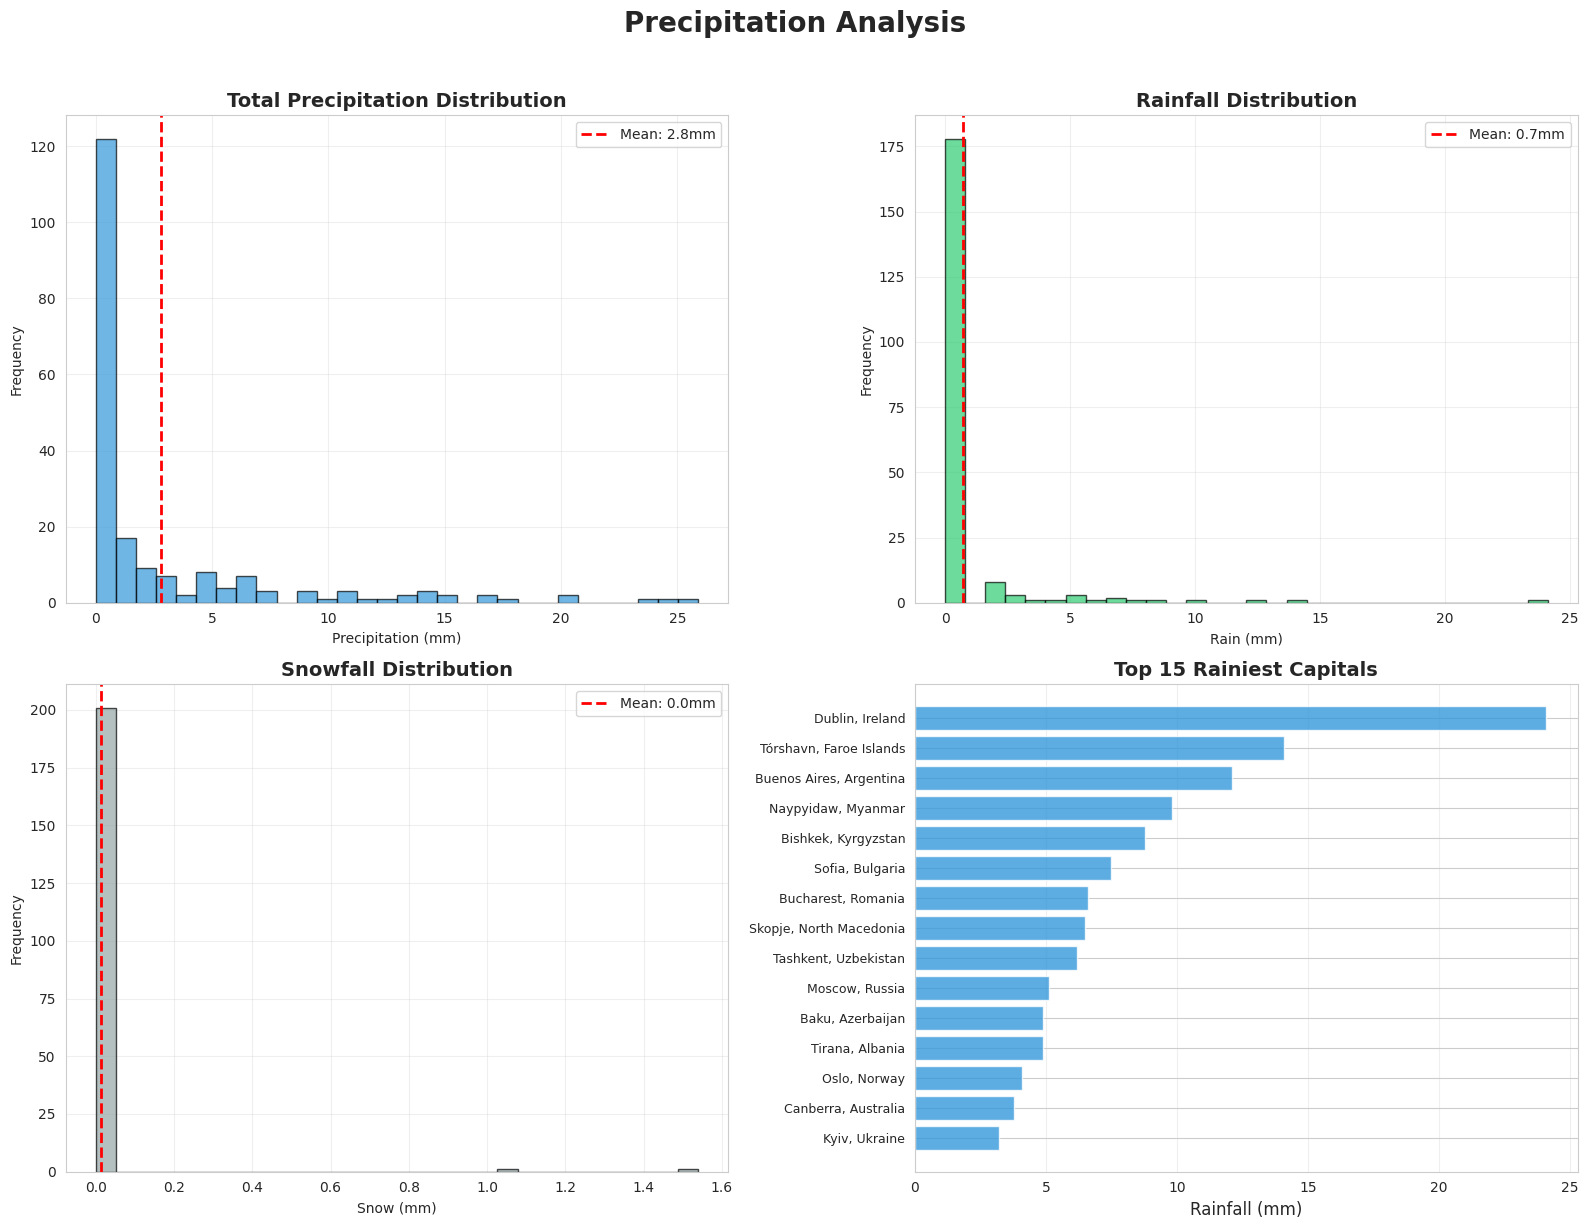

Chart 4: Precipitation Analysis - Saved!


In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Precipitation Analysis', fontsize=20, fontweight='bold', y=1.02)

# Total precipitation distribution
axes[0, 0].hist(df['precip_mm'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Total Precipitation Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Precipitation (mm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['precip_mm'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['precip_mm'].mean():.1f}mm")
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Rain distribution
axes[0, 1].hist(df['rain_mm'], bins=30, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Rainfall Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Rain (mm)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['rain_mm'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['rain_mm'].mean():.1f}mm")
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Snow distribution
axes[1, 0].hist(df['snow_mm'], bins=30, color='#95a5a6', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Snowfall Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Snow (mm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df['snow_mm'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['snow_mm'].mean():.1f}mm")
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Top 15 rainiest cities
rainiest = df.nlargest(15, 'rain_mm')[['capital', 'country', 'rain_mm']].sort_values('rain_mm')
axes[1, 1].barh(range(len(rainiest)), rainiest['rain_mm'], color='#3498db', alpha=0.8)
axes[1, 1].set_yticks(range(len(rainiest)))
axes[1, 1].set_yticklabels([f"{cap}, {cou}" for cap, cou in zip(rainiest['capital'], rainiest['country'])], fontsize=9)
axes[1, 1].set_xlabel('Rainfall (mm)', fontsize=12)
axes[1, 1].set_title('Top 15 Rainiest Capitals', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/charts/04_precipitation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 4: Precipitation Analysis - Saved!")

# VISUALIZATION 5: Wind Analysis

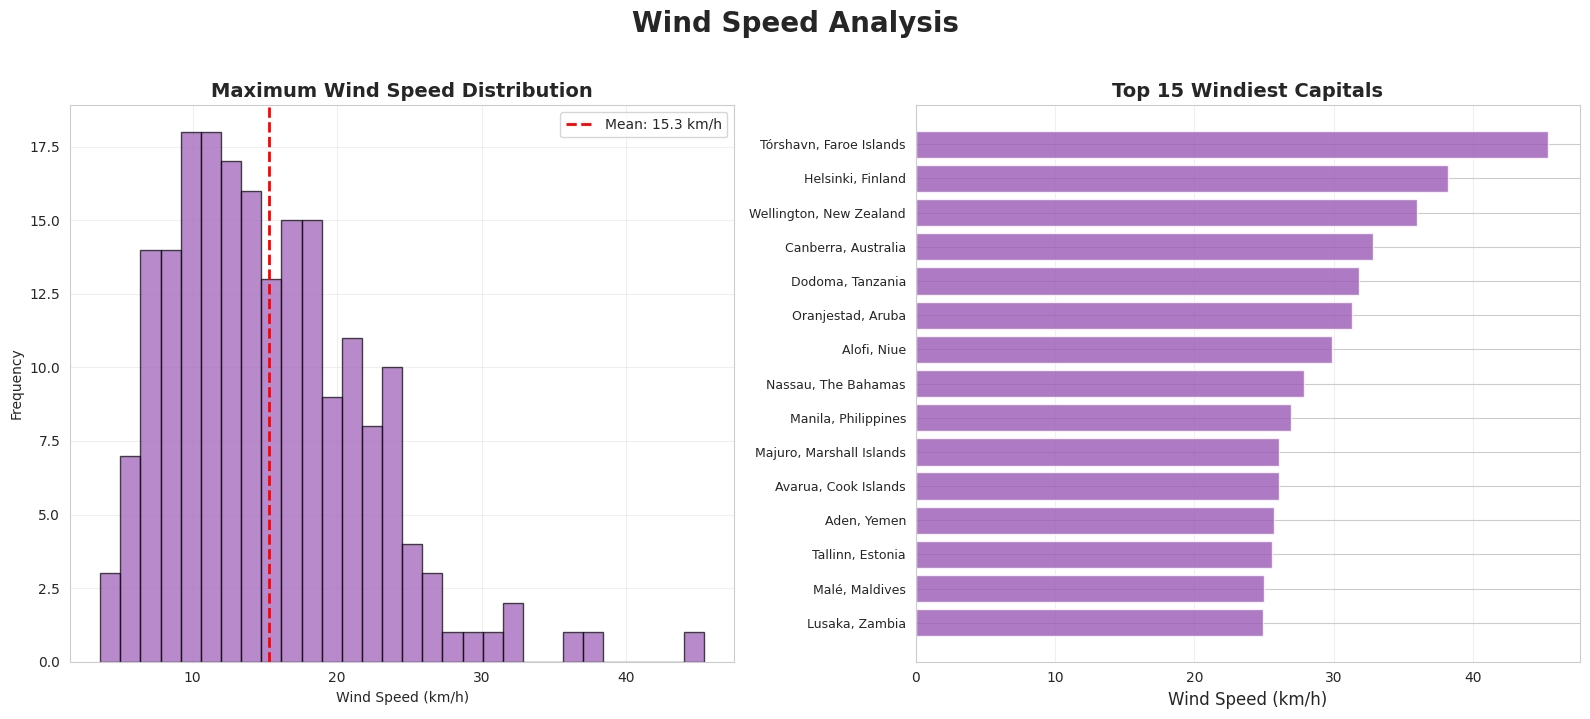

Chart 5: Wind Analysis - Saved!


In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Wind Speed Analysis', fontsize=20, fontweight='bold', y=1.02)

# Wind speed distribution
axes[0].hist(df['windspeed_10m_max_kmh'], bins=30, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[0].set_title('Maximum Wind Speed Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Wind Speed (km/h)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['windspeed_10m_max_kmh'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f"Mean: {df['windspeed_10m_max_kmh'].mean():.1f} km/h")
axes[0].legend()
axes[0].grid(alpha=0.3)

# Top 15 windiest cities
windiest = df.nlargest(15, 'windspeed_10m_max_kmh')[['capital', 'country', 'windspeed_10m_max_kmh']].sort_values('windspeed_10m_max_kmh')
axes[1].barh(range(len(windiest)), windiest['windspeed_10m_max_kmh'], color='#9b59b6', alpha=0.8)
axes[1].set_yticks(range(len(windiest)))
axes[1].set_yticklabels([f"{cap}, {cou}" for cap, cou in zip(windiest['capital'], windiest['country'])], fontsize=9)
axes[1].set_xlabel('Wind Speed (km/h)', fontsize=12)
axes[1].set_title('Top 15 Windiest Capitals', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/charts/05_wind_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 5: Wind Analysis - Saved!")

# VISUALIZATION 6: Sunshine & Radiation Analysis

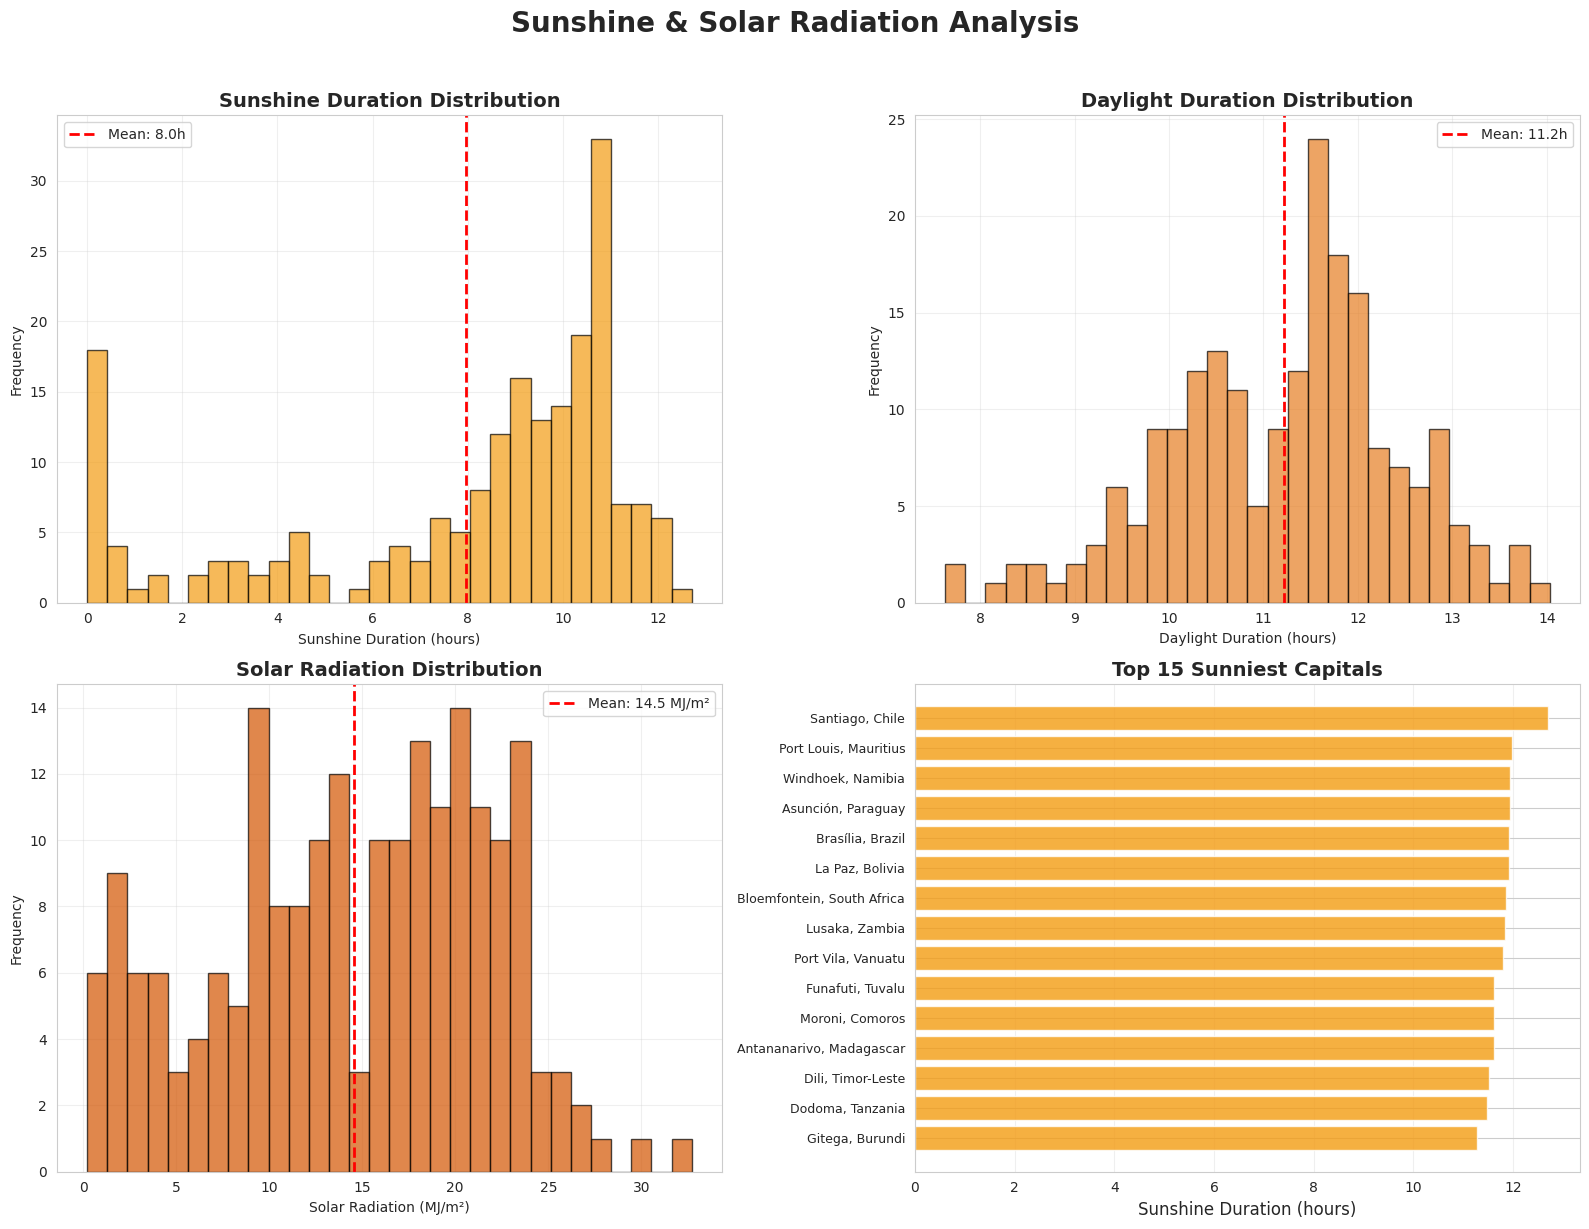

Chart 6: Sunshine & Radiation - Saved!


In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Sunshine & Solar Radiation Analysis', fontsize=20, fontweight='bold', y=1.02)

# Sunshine duration
axes[0, 0].hist(df['sunshine_duration_s']/3600, bins=30, color='#f39c12', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Sunshine Duration Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sunshine Duration (hours)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline((df['sunshine_duration_s']/3600).mean(), color='red', linestyle='--', linewidth=2, 
                   label=f"Mean: {(df['sunshine_duration_s']/3600).mean():.1f}h")
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Daylight duration
axes[0, 1].hist(df['daylight_duration_s']/3600, bins=30, color='#e67e22', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Daylight Duration Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Daylight Duration (hours)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline((df['daylight_duration_s']/3600).mean(), color='red', linestyle='--', linewidth=2, 
                   label=f"Mean: {(df['daylight_duration_s']/3600).mean():.1f}h")
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Solar radiation
axes[1, 0].hist(df['shortwave_radiation_MJ_m2'], bins=30, color='#d35400', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Solar Radiation Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Solar Radiation (MJ/m²)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df['shortwave_radiation_MJ_m2'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f"Mean: {df['shortwave_radiation_MJ_m2'].mean():.1f} MJ/m²")
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Top 15 sunniest cities
df['sunshine_hours'] = df['sunshine_duration_s'] / 3600
sunniest = df.nlargest(15, 'sunshine_hours')[['capital', 'country', 'sunshine_hours']].sort_values('sunshine_hours')
axes[1, 1].barh(range(len(sunniest)), sunniest['sunshine_hours'], color='#f39c12', alpha=0.8)
axes[1, 1].set_yticks(range(len(sunniest)))
axes[1, 1].set_yticklabels([f"{cap}, {cou}" for cap, cou in zip(sunniest['capital'], sunniest['country'])], fontsize=9)
axes[1, 1].set_xlabel('Sunshine Duration (hours)', fontsize=12)
axes[1, 1].set_title('Top 15 Sunniest Capitals', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/charts/06_sunshine_radiation.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 6: Sunshine & Radiation - Saved!")

# VISUALIZATION 7: Correlation Heatmap

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


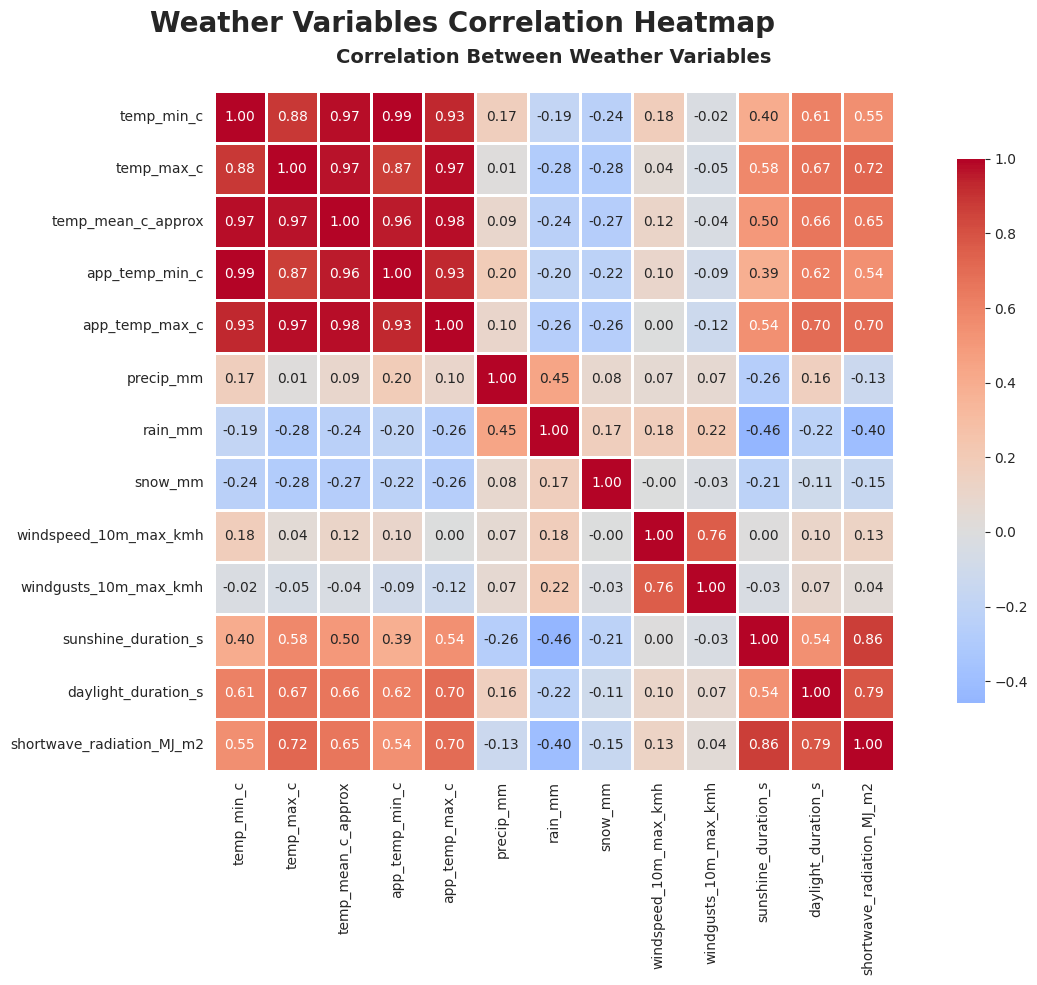

Chart 7: Correlation Heatmap - Saved!


In [15]:
fig, ax = plt.subplots(figsize=(14, 10))
fig.suptitle('Weather Variables Correlation Heatmap', fontsize=20, fontweight='bold', y=0.98)

# Select numerical columns for correlation
corr_cols = ['temp_min_c', 'temp_max_c', 'temp_mean_c_approx', 'app_temp_min_c', 'app_temp_max_c',
             'precip_mm', 'rain_mm', 'snow_mm', 'windspeed_10m_max_kmh', 'windgusts_10m_max_kmh',
             'sunshine_duration_s', 'daylight_duration_s', 'shortwave_radiation_MJ_m2']

correlation_matrix = df[corr_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Between Weather Variables', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('/kaggle/working/charts/07_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 7: Correlation Heatmap - Saved!")

# VISUALIZATION 8: Geographic Distribution

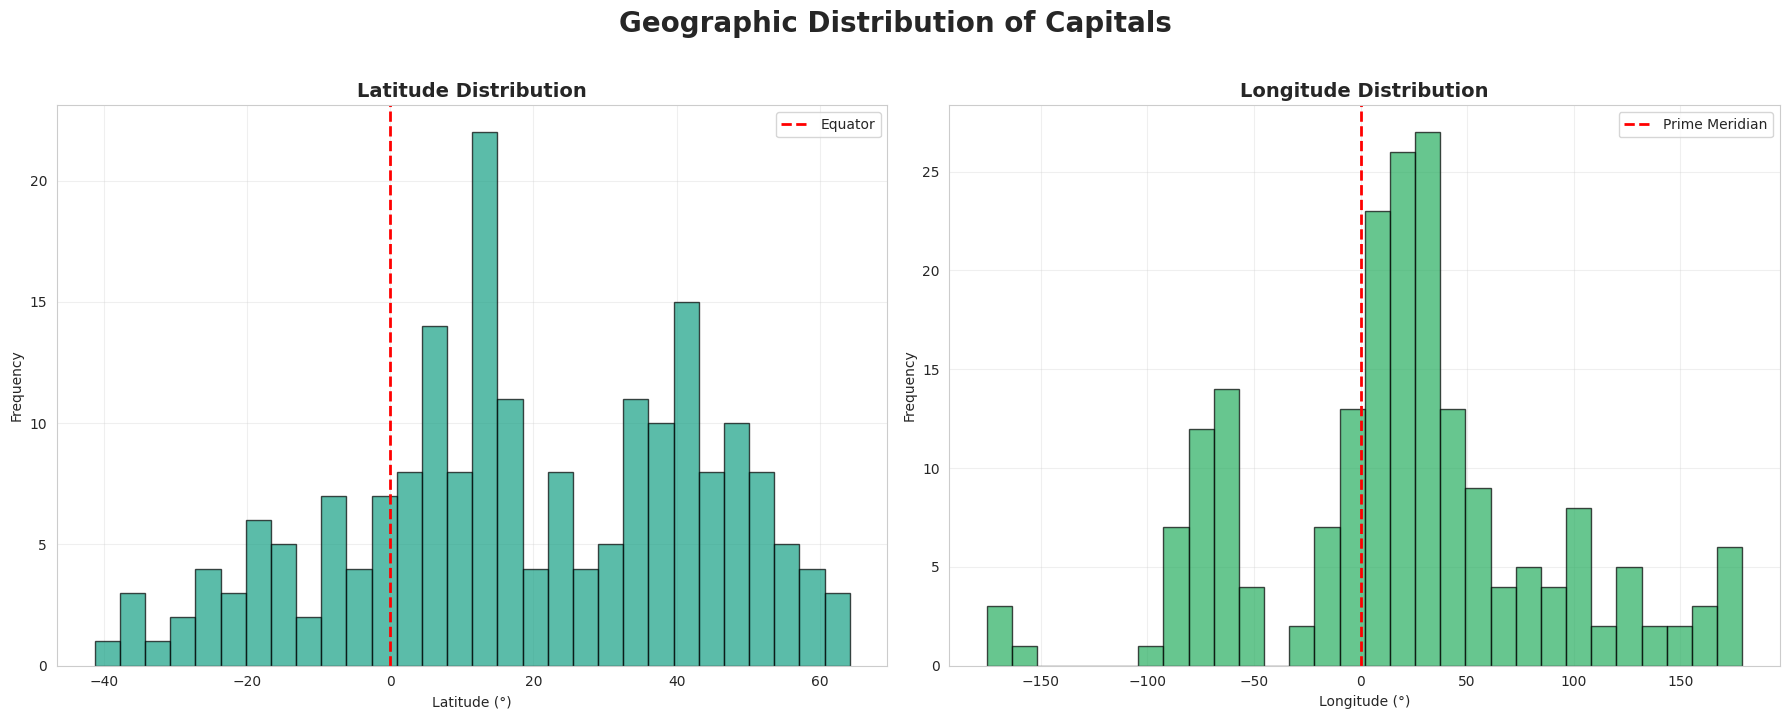

Chart 8: Geographic Distribution - Saved!


In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Geographic Distribution of Capitals', fontsize=20, fontweight='bold', y=1.02)

# Latitude distribution
axes[0].hist(df['lat'], bins=30, color='#16a085', edgecolor='black', alpha=0.7)
axes[0].set_title('Latitude Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Latitude (°)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Equator')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Longitude distribution
axes[1].hist(df['lon'], bins=30, color='#27ae60', edgecolor='black', alpha=0.7)
axes[1].set_title('Longitude Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Longitude (°)')
axes[1].set_ylabel('Frequency')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Prime Meridian')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/charts/08_geographic_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 8: Geographic Distribution - Saved!")

# VISUALIZATION 9: Hemisphere Comparison

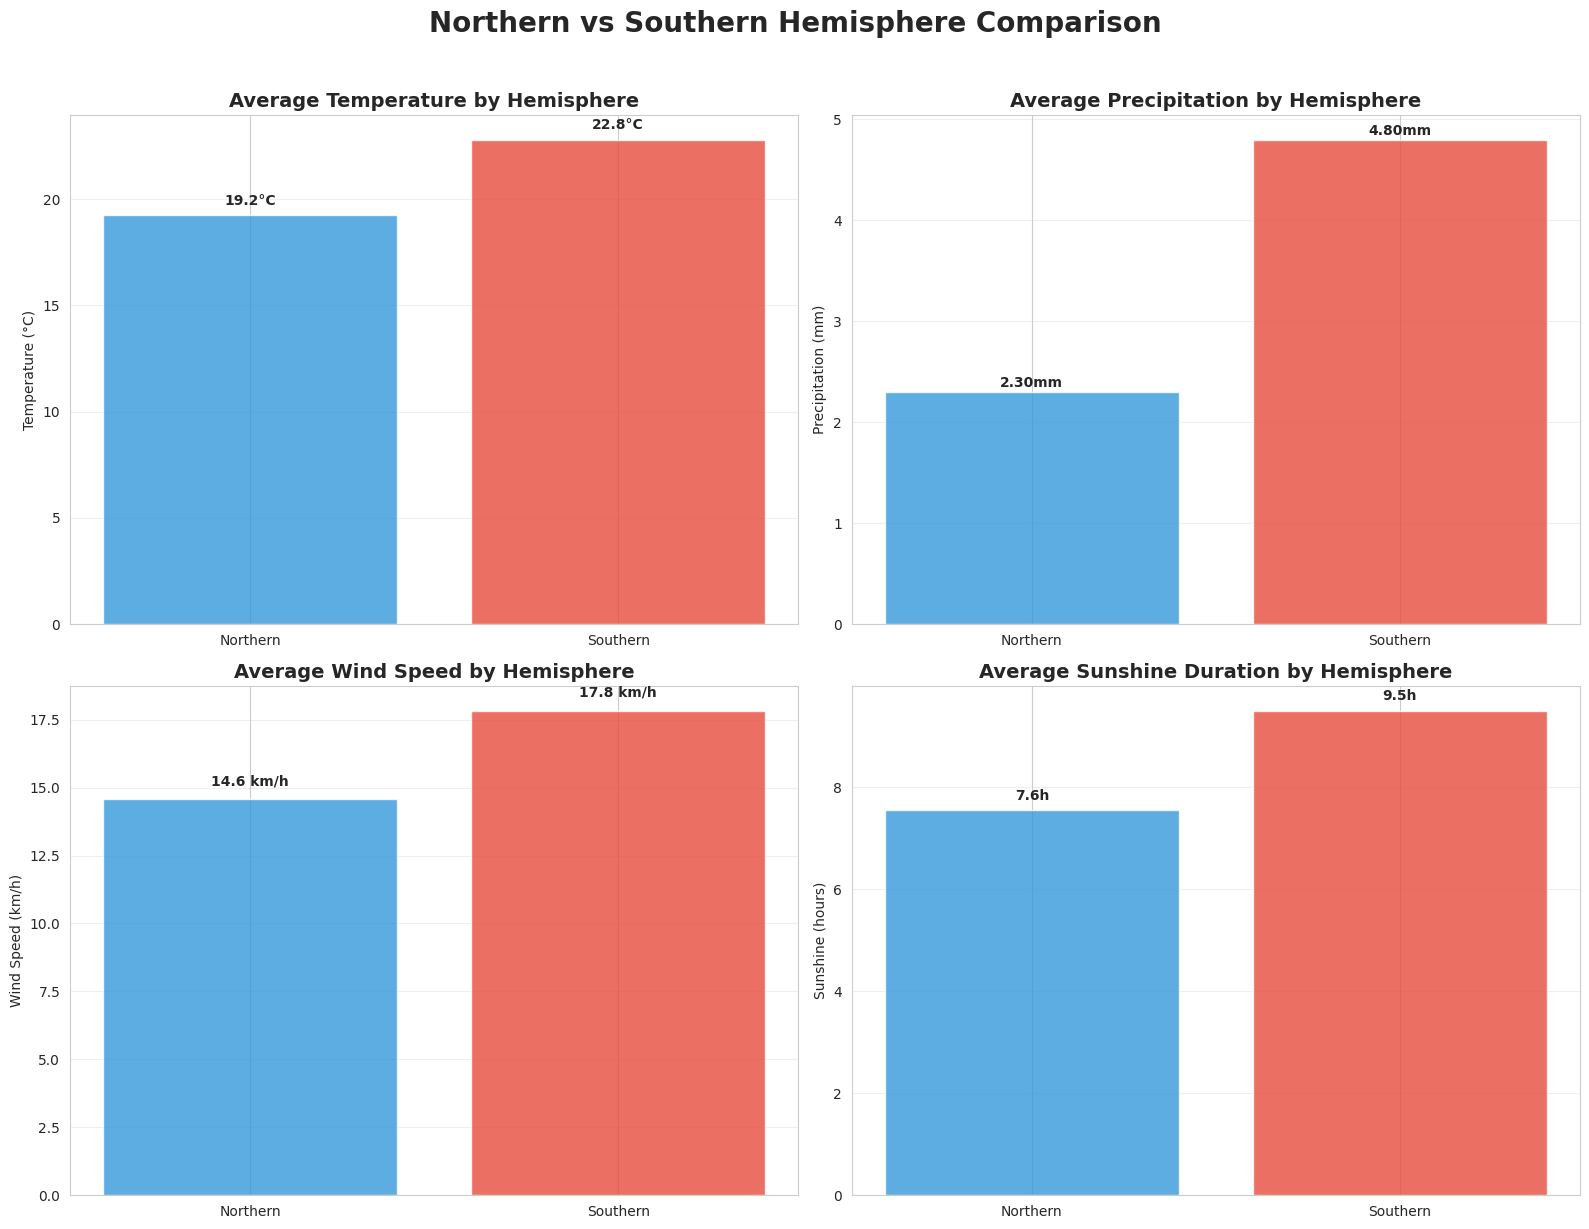

Chart 9: Hemisphere Comparison - Saved!


In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Northern vs Southern Hemisphere Comparison', fontsize=20, fontweight='bold', y=1.02)

hemisphere_data = df.groupby('hemisphere').agg({
    'temp_mean_c_approx': 'mean',
    'precip_mm': 'mean',
    'windspeed_10m_max_kmh': 'mean',
    'sunshine_duration_s': 'mean'
}).reset_index()

# Temperature comparison
axes[0, 0].bar(hemisphere_data['hemisphere'], hemisphere_data['temp_mean_c_approx'], 
               color=['#3498db', '#e74c3c'], alpha=0.8)
axes[0, 0].set_title('Average Temperature by Hemisphere', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(hemisphere_data['temp_mean_c_approx']):
    axes[0, 0].text(i, v + 0.5, f'{v:.1f}°C', ha='center', fontweight='bold')

# Precipitation comparison
axes[0, 1].bar(hemisphere_data['hemisphere'], hemisphere_data['precip_mm'], 
               color=['#3498db', '#e74c3c'], alpha=0.8)
axes[0, 1].set_title('Average Precipitation by Hemisphere', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Precipitation (mm)')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(hemisphere_data['precip_mm']):
    axes[0, 1].text(i, v + 0.05, f'{v:.2f}mm', ha='center', fontweight='bold')

# Wind speed comparison
axes[1, 0].bar(hemisphere_data['hemisphere'], hemisphere_data['windspeed_10m_max_kmh'], 
               color=['#3498db', '#e74c3c'], alpha=0.8)
axes[1, 0].set_title('Average Wind Speed by Hemisphere', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Wind Speed (km/h)')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(hemisphere_data['windspeed_10m_max_kmh']):
    axes[1, 0].text(i, v + 0.5, f'{v:.1f} km/h', ha='center', fontweight='bold')

# Sunshine comparison
axes[1, 1].bar(hemisphere_data['hemisphere'], hemisphere_data['sunshine_duration_s']/3600, 
               color=['#3498db', '#e74c3c'], alpha=0.8)
axes[1, 1].set_title('Average Sunshine Duration by Hemisphere', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Sunshine (hours)')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(hemisphere_data['sunshine_duration_s']/3600):
    axes[1, 1].text(i, v + 0.2, f'{v:.1f}h', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('/kaggle/working/charts/09_hemisphere_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 9: Hemisphere Comparison - Saved!")

# VISUALIZATION 10: Extreme Weather Events

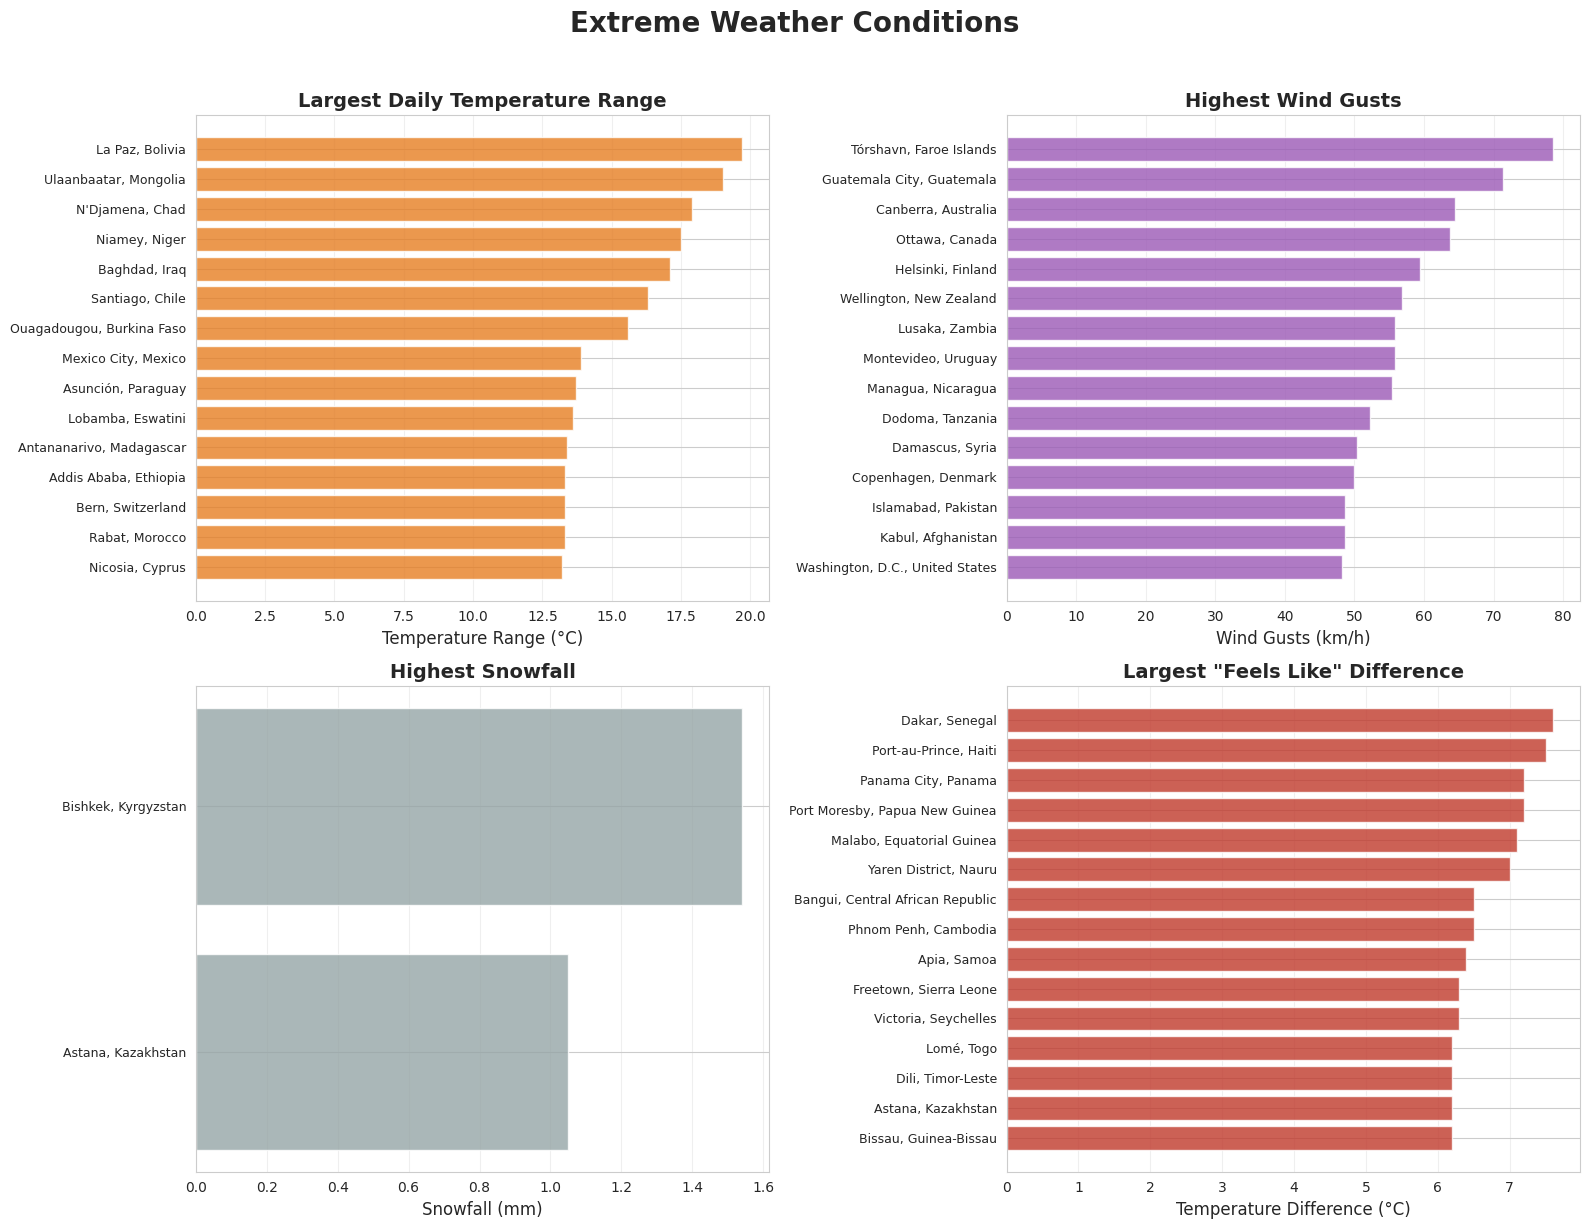

Chart 10: Extreme Weather Events - Saved!


In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Extreme Weather Conditions', fontsize=20, fontweight='bold', y=1.02)

# Largest temperature range
temp_range_top = df.nlargest(15, 'temp_range_c')[['capital', 'country', 'temp_range_c']].sort_values('temp_range_c')
axes[0, 0].barh(range(len(temp_range_top)), temp_range_top['temp_range_c'], color='#e67e22', alpha=0.8)
axes[0, 0].set_yticks(range(len(temp_range_top)))
axes[0, 0].set_yticklabels([f"{cap}, {cou}" for cap, cou in zip(temp_range_top['capital'], temp_range_top['country'])], fontsize=9)
axes[0, 0].set_xlabel('Temperature Range (°C)', fontsize=12)
axes[0, 0].set_title('Largest Daily Temperature Range', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# Highest wind gusts
wind_gusts_top = df.nlargest(15, 'windgusts_10m_max_kmh')[['capital', 'country', 'windgusts_10m_max_kmh']].sort_values('windgusts_10m_max_kmh')
axes[0, 1].barh(range(len(wind_gusts_top)), wind_gusts_top['windgusts_10m_max_kmh'], color='#9b59b6', alpha=0.8)
axes[0, 1].set_yticks(range(len(wind_gusts_top)))
axes[0, 1].set_yticklabels([f"{cap}, {cou}" for cap, cou in zip(wind_gusts_top['capital'], wind_gusts_top['country'])], fontsize=9)
axes[0, 1].set_xlabel('Wind Gusts (km/h)', fontsize=12)
axes[0, 1].set_title('Highest Wind Gusts', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# Most snowfall
snow_top = df[df['snow_mm'] > 0].nlargest(15, 'snow_mm')[['capital', 'country', 'snow_mm']].sort_values('snow_mm')
if len(snow_top) > 0:
    axes[1, 0].barh(range(len(snow_top)), snow_top['snow_mm'], color='#95a5a6', alpha=0.8)
    axes[1, 0].set_yticks(range(len(snow_top)))
    axes[1, 0].set_yticklabels([f"{cap}, {cou}" for cap, cou in zip(snow_top['capital'], snow_top['country'])], fontsize=9)
    axes[1, 0].set_xlabel('Snowfall (mm)', fontsize=12)
    axes[1, 0].set_title('Highest Snowfall', fontsize=14, fontweight='bold')
    axes[1, 0].grid(axis='x', alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'No Snow Data Available', ha='center', va='center', fontsize=14)
    axes[1, 0].set_title('Highest Snowfall', fontsize=14, fontweight='bold')

# Apparent temperature difference
df['app_temp_diff'] = abs(df['app_temp_max_c'] - df['temp_max_c'])
app_temp_top = df.nlargest(15, 'app_temp_diff')[['capital', 'country', 'app_temp_diff']].sort_values('app_temp_diff')
axes[1, 1].barh(range(len(app_temp_top)), app_temp_top['app_temp_diff'], color='#c0392b', alpha=0.8)
axes[1, 1].set_yticks(range(len(app_temp_top)))
axes[1, 1].set_yticklabels([f"{cap}, {cou}" for cap, cou in zip(app_temp_top['capital'], app_temp_top['country'])], fontsize=9)
axes[1, 1].set_xlabel('Temperature Difference (°C)', fontsize=12)
axes[1, 1].set_title('Largest "Feels Like" Difference', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/charts/10_extreme_weather.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 10: Extreme Weather Events - Saved!")

# 📊 KEY INSIGHTS & STATISTICS

In [19]:
print("\nTEMPERATURE INSIGHTS:")
print(f"   • Hottest Capital: {df.loc[df['temp_mean_c_approx'].idxmax(), 'capital']}, "
      f"{df.loc[df['temp_mean_c_approx'].idxmax(), 'country']} ({df['temp_mean_c_approx'].max():.1f}°C)")
print(f"   • Coldest Capital: {df.loc[df['temp_mean_c_approx'].idxmin(), 'capital']}, "
      f"{df.loc[df['temp_mean_c_approx'].idxmin(), 'country']} ({df['temp_mean_c_approx'].min():.1f}°C)")
print(f"   • Global Average Temperature: {df['temp_mean_c_approx'].mean():.1f}°C")
print(f"   • Temperature Standard Deviation: {df['temp_mean_c_approx'].std():.1f}°C")
print(f"   • Largest Daily Temperature Range: {df['temp_range_c'].max():.1f}°C in "
      f"{df.loc[df['temp_range_c'].idxmax(), 'capital']}")

print("\nPRECIPITATION INSIGHTS:")
print(f"   • Rainiest Capital: {df.loc[df['rain_mm'].idxmax(), 'capital']}, "
      f"{df.loc[df['rain_mm'].idxmax(), 'country']} ({df['rain_mm'].max():.1f}mm)")
print(f"   • Average Global Rainfall: {df['rain_mm'].mean():.2f}mm")
print(f"   • Cities with Rain (>0mm): {(df['rain_mm'] > 0).sum()} ({(df['rain_mm'] > 0).sum()/len(df)*100:.1f}%)")
print(f"   • Cities with Snow (>0mm): {(df['snow_mm'] > 0).sum()} ({(df['snow_mm'] > 0).sum()/len(df)*100:.1f}%)")
if df['snow_mm'].max() > 0:
    print(f"   • Snowiest Capital: {df.loc[df['snow_mm'].idxmax(), 'capital']}, "
          f"{df.loc[df['snow_mm'].idxmax(), 'country']} ({df['snow_mm'].max():.1f}mm)")

print("\n WIND INSIGHTS:")
print(f"   • Windiest Capital: {df.loc[df['windspeed_10m_max_kmh'].idxmax(), 'capital']}, "
      f"{df.loc[df['windspeed_10m_max_kmh'].idxmax(), 'country']} ({df['windspeed_10m_max_kmh'].max():.1f} km/h)")
print(f"   • Average Wind Speed: {df['windspeed_10m_max_kmh'].mean():.1f} km/h")
print(f"   • Highest Wind Gust: {df['windgusts_10m_max_kmh'].max():.1f} km/h in "
      f"{df.loc[df['windgusts_10m_max_kmh'].idxmax(), 'capital']}")

print("\nSUNSHINE INSIGHTS:")
print(f"   • Sunniest Capital: {df.loc[df['sunshine_duration_s'].idxmax(), 'capital']}, "
      f"{df.loc[df['sunshine_duration_s'].idxmax(), 'country']} ({df['sunshine_duration_s'].max()/3600:.1f} hours)")
print(f"   • Average Sunshine Duration: {df['sunshine_duration_s'].mean()/3600:.1f} hours")
print(f"   • Average Daylight Duration: {df['daylight_duration_s'].mean()/3600:.1f} hours")
print(f"   • Highest Solar Radiation: {df['shortwave_radiation_MJ_m2'].max():.1f} MJ/m² in "
      f"{df.loc[df['shortwave_radiation_MJ_m2'].idxmax(), 'capital']}")

print("\nGEOGRAPHIC INSIGHTS:")
print(f"   • Northern Hemisphere Capitals: {(df['hemisphere'] == 'Northern').sum()} "
      f"({(df['hemisphere'] == 'Northern').sum()/len(df)*100:.1f}%)")
print(f"   • Southern Hemisphere Capitals: {(df['hemisphere'] == 'Southern').sum()} "
      f"({(df['hemisphere'] == 'Southern').sum()/len(df)*100:.1f}%)")
print(f"   • Northernmost Capital: {df.loc[df['lat'].idxmax(), 'capital']}, "
      f"{df.loc[df['lat'].idxmax(), 'country']} ({df['lat'].max():.2f}°N)")
print(f"   • Southernmost Capital: {df.loc[df['lat'].idxmin(), 'capital']}, "
      f"{df.loc[df['lat'].idxmin(), 'country']} ({df['lat'].min():.2f}°S)")

print("\nCLIMATE ZONE DISTRIBUTION:")
for zone in df['climate_zone'].value_counts().index:
    count = df['climate_zone'].value_counts()[zone]
    percentage = (count / len(df)) * 100
    print(f"   • {zone}: {count} capitals ({percentage:.1f}%)")


TEMPERATURE INSIGHTS:
   • Hottest Capital: Khartoum, Sudan (32.5°C)
   • Coldest Capital: Astana, Kazakhstan (-10.1°C)
   • Global Average Temperature: 20.0°C
   • Temperature Standard Deviation: 8.4°C
   • Largest Daily Temperature Range: 19.7°C in La Paz

PRECIPITATION INSIGHTS:
   • Rainiest Capital: Dublin, Ireland (24.1mm)
   • Average Global Rainfall: 0.72mm
   • Cities with Rain (>0mm): 33 (16.3%)
   • Cities with Snow (>0mm): 2 (1.0%)
   • Snowiest Capital: Bishkek, Kyrgyzstan (1.5mm)

 WIND INSIGHTS:
   • Windiest Capital: Tórshavn, Faroe Islands (45.4 km/h)
   • Average Wind Speed: 15.3 km/h
   • Highest Wind Gust: 78.5 km/h in Tórshavn

SUNSHINE INSIGHTS:
   • Sunniest Capital: Santiago, Chile (12.7 hours)
   • Average Sunshine Duration: 8.0 hours
   • Average Daylight Duration: 11.2 hours
   • Highest Solar Radiation: 32.7 MJ/m² in La Paz

GEOGRAPHIC INSIGHTS:
   • Northern Hemisphere Capitals: 161 (79.3%)
   • Southern Hemisphere Capitals: 42 (20.7%)
   • Northernmost Ca

# 📈 ADVANCED ANALYSIS: STATISTICAL TESTS


In [20]:
from scipy import stats

corr_lat_temp, p_value = stats.pearsonr(df['lat'].abs(), df['temp_mean_c_approx'])
print(f"\n Temperature vs Latitude Correlation:")
print(f"   • Correlation Coefficient: {corr_lat_temp:.3f}")
print(f"   • P-value: {p_value:.6f}")
print(f"   • Interpretation: {'Strong' if abs(corr_lat_temp) > 0.7 else 'Moderate' if abs(corr_lat_temp) > 0.4 else 'Weak'} "
      f"{'negative' if corr_lat_temp < 0 else 'positive'} correlation")

# Hemisphere temperature comparison
northern_temps = df[df['hemisphere'] == 'Northern']['temp_mean_c_approx']
southern_temps = df[df['hemisphere'] == 'Southern']['temp_mean_c_approx']
t_stat, p_value_hemisphere = stats.ttest_ind(northern_temps, southern_temps)

print(f"\nHemisphere Temperature Comparison (T-test):")
print(f"   • Northern Hemisphere Mean: {northern_temps.mean():.2f}°C")
print(f"   • Southern Hemisphere Mean: {southern_temps.mean():.2f}°C")
print(f"   • T-statistic: {t_stat:.3f}")
print(f"   • P-value: {p_value_hemisphere:.6f}")
print(f"   • Result: {'Statistically significant' if p_value_hemisphere < 0.05 else 'Not statistically significant'} difference")



 Temperature vs Latitude Correlation:
   • Correlation Coefficient: -0.802
   • P-value: 0.000000
   • Interpretation: Strong negative correlation

Hemisphere Temperature Comparison (T-test):
   • Northern Hemisphere Mean: 19.24°C
   • Southern Hemisphere Mean: 22.80°C
   • T-statistic: -2.477
   • P-value: 0.014062
   • Result: Statistically significant difference


## Final Summary

In [21]:
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Capitals',
        'Countries',
        'Avg Temperature (°C)',
        'Hottest Capital',
        'Coldest Capital',
        'Avg Rainfall (mm)',
        'Rainiest Capital',
        'Avg Wind Speed (km/h)',
        'Windiest Capital',
        'Avg Sunshine (hours)',
        'Northern Hemisphere %',
        'Southern Hemisphere %'
    ],
    'Value': [
        len(df),
        df['country'].nunique(),
        f"{df['temp_mean_c_approx'].mean():.1f}",
        f"{df.loc[df['temp_mean_c_approx'].idxmax(), 'capital']}, {df.loc[df['temp_mean_c_approx'].idxmax(), 'country']}",
        f"{df.loc[df['temp_mean_c_approx'].idxmin(), 'capital']}, {df.loc[df['temp_mean_c_approx'].idxmin(), 'country']}",
        f"{df['rain_mm'].mean():.2f}",
        f"{df.loc[df['rain_mm'].idxmax(), 'capital']}, {df.loc[df['rain_mm'].idxmax(), 'country']}",
        f"{df['windspeed_10m_max_kmh'].mean():.1f}",
        f"{df.loc[df['windspeed_10m_max_kmh'].idxmax(), 'capital']}, {df.loc[df['windspeed_10m_max_kmh'].idxmax(), 'country']}",
        f"{df['sunshine_duration_s'].mean()/3600:.1f}",
        f"{(df['hemisphere'] == 'Northern').sum()/len(df)*100:.1f}",
        f"{(df['hemisphere'] == 'Southern').sum()/len(df)*100:.1f}"
    ]
})

summary_stats.to_csv('/kaggle/working/summary_statistics.csv', index=False)
print("Summary statistics saved to: summary_statistics.csv")

# Export top cities by category
top_cities = pd.DataFrame({
    'Category': ['Hottest', 'Coldest', 'Rainiest', 'Windiest', 'Sunniest'],
    'Capital': [
        df.loc[df['temp_mean_c_approx'].idxmax(), 'capital'],
        df.loc[df['temp_mean_c_approx'].idxmin(), 'capital'],
        df.loc[df['rain_mm'].idxmax(), 'capital'],
        df.loc[df['windspeed_10m_max_kmh'].idxmax(), 'capital'],
        df.loc[df['sunshine_duration_s'].idxmax(), 'capital']
    ],
    'Country': [
        df.loc[df['temp_mean_c_approx'].idxmax(), 'country'],
        df.loc[df['temp_mean_c_approx'].idxmin(), 'country'],
        df.loc[df['rain_mm'].idxmax(), 'country'],
        df.loc[df['windspeed_10m_max_kmh'].idxmax(), 'country'],
        df.loc[df['sunshine_duration_s'].idxmax(), 'country']
    ],
    'Value': [
        f"{df['temp_mean_c_approx'].max():.1f}°C",
        f"{df['temp_mean_c_approx'].min():.1f}°C",
        f"{df['rain_mm'].max():.1f}mm",
        f"{df['windspeed_10m_max_kmh'].max():.1f} km/h",
        f"{df['sunshine_duration_s'].max()/3600:.1f} hours"
    ]
})

top_cities.to_csv('/kaggle/working/top_cities_by_category.csv', index=False)
print("Top cities by category saved to: top_cities_by_category.csv")

# Export processed dataset with new features
df.to_csv('/kaggle/working/processed_weather_data.csv', index=False)
print("Processed dataset saved to: processed_weather_data.csv")


Summary statistics saved to: summary_statistics.csv
Top cities by category saved to: top_cities_by_category.csv
Processed dataset saved to: processed_weather_data.csv
